In [1]:
import os
from skimage import img_as_uint
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
from skimage.filters import threshold_otsu, threshold_local
from skimage import morphology
from sklearn.cluster import DBSCAN
from scipy.ndimage.morphology import binary_fill_holes

from skimage.morphology import dilation, erosion
from skimage.morphology import *

In [2]:
import cv2
from cv2 import dilate
from cv2 import adaptiveThreshold

In [12]:
def cv_remove_small_objects(im, min_size):
    nb_components, output, stats, centroids = cv2.connectedComponentsWithStats(im, connectivity=8)
    sizes = stats[1:, -1]; 
    nb_components = nb_components - 1

    res = np.zeros((output.shape))
    for i in range(0, nb_components):
        if sizes[i] >= min_size:
            res[output == i + 1] = 1
            
    return res

def binarize(im):
    binary_local = im=cv2.adaptiveThreshold(
        src=np.array(cv2.medianBlur(im, 5), dtype=np.uint8), 
        maxValue=255, 
        adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
        thresholdType=cv2.THRESH_BINARY_INV, 
        blockSize=99, 
        C=20)
    
    cleaned = cv_remove_small_objects(binary_local, 200)
    
    strel = square(30)    
    cleaned = cv2.dilate(np.array(cleaned, dtype=np.uint8), strel)
    
    return cleaned

In [4]:
def ImageToFeatures(img):
    data = []
    labels = []
    for i, row in enumerate(img):
        for j, val in enumerate(row):
            if val:
                data.append([j, i])
                labels.append(val)    
    return np.array(data), np.array(labels)

def FeaturesToImage(fts, width, height, correction=False):
    minx = min(fts[:, 0])
    miny = min(fts[:, 1])

    maxx = max(fts[:, 0])
    maxy = max(fts[:, 1])
    
    image = np.zeros((width, height))
    
    if correction:
        ft_width = maxx-minx
        ft_height = maxy-miny
        if ft_width > width or ft_height > height:
            return np.zeros((width, height))
        indent_width = int((width-ft_width)/2)
        indent_height = int((height-ft_height)/2)
        for x, y in fts:
            image[y-miny+indent_height, x-minx+indent_width] = 1
    else:
        for x, y in fts:
            image[y, x] = 1
            
    return image

In [5]:
def n_clusters(labels):
    return len(set(labels)) - (1 if -1 in labels else 0)

In [6]:
notch_size=700
def prepare(image):
    pixels, labels = ImageToFeatures(label(image))
    
    n_clt = n_clusters(labels)
    
    clusters = [np.where(labels==i)[0] for i in range(1, n_clt + 1)]
    
    notches=[]
    for cluster in clusters:
        notches.append([pixels[ix] for ix in cluster])
    notches = np.array(notches)
    
    data=list(map(lambda x: FeaturesToImage(np.array(x), width=notch_size, height=notch_size, correction=True), notches))
    data_src=list(map(lambda x: FeaturesToImage(np.array(x), width=image.shape[0], height=image.shape[1]), notches))
    
    data_prep = []
    for dt in data:
        if dt is not None:
            data_prep.append(dt.reshape(notch_size**2))
        else:
            data_prep.append(np.zeros(notch_size**2))
            
    return (data, data_src, data_prep)

In [7]:
path='d:\\photo1\\'
image = cv2.imread(path+'20180810_0056.jpg', cv2.IMREAD_GRAYSCALE)

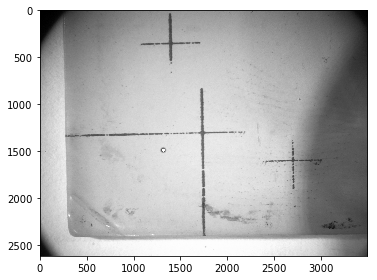

In [9]:
image=cv2.medianBlur(image,5)
io.imshow(image)
plt.show()

D:\Anaconda\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:77: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


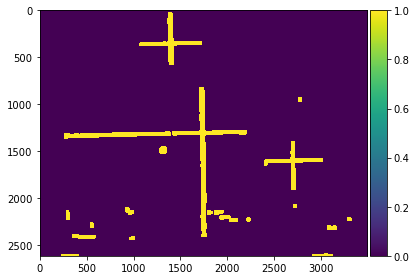

In [13]:
bimage = binarize(image)
io.imshow(bimage)
plt.show()

In [14]:
%%time
data, data_src, data_prep = prepare(bimage)

Wall time: 4.33 s


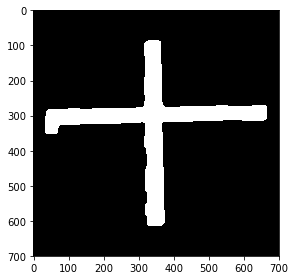

In [16]:
io.imshow(data[4])
plt.show()

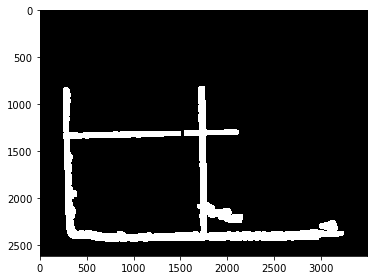

In [51]:
io.imshow(data_src[4])
plt.show()

In [54]:
%%time

fld = os.getcwd() + '\\photo1\\'
image = io.imread(fld + '20180810_0056.jpg', as_gray=True)

bimage = binarize_(image)

data, data_src, data_prep = prepare(bimage)

Wall time: 9.33 s


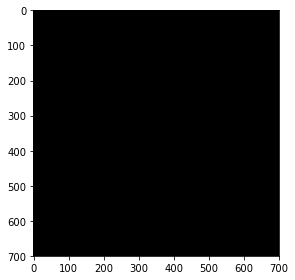

In [63]:
io.imshow(data[3])
plt.show()

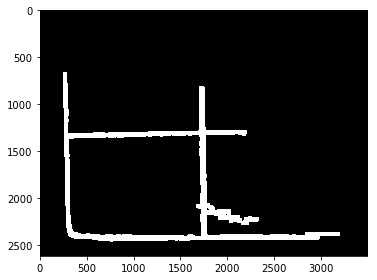

In [64]:
io.imshow(data_src[3])
plt.show()

In [ ]:
#Wall time: 11.4 s

In [55]:
10*50/60

8.333333333333334